In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import cv2

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

# Load labels

In [2]:
labels_or = pd.read_csv("data/labels.csv")

In [3]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [4]:
# path
path_train = "data/train/"
# get top 10 breeds
top_10 = labels_or['breed'].value_counts()[:10].index

cor = dict([(breed, idx) for idx, breed in enumerate(top_10)])

# Code model

In [5]:
Xs = []
ys = []
for idx, val in enumerate(top_10):
    # aux 
    aux = top_10[~np.isin(np.arange(top_10.size),idx)]
    # divide choosen label and not choosen 
    labels = labels_or.loc[labels_or['breed'] == top_10[idx]]
      
    filenames = [path_train + fname + ".jpg" for fname in labels['id']]

    y = np.array([cor[breed] for breed in labels['breed']])
    
    # Resize images

    IMG_SIZE = 150

    imgs = []
    for fname in filenames:
        img = cv2.imread(fname)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        imgs.append(cv2.resize(img, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC))

    imgs = np.array(imgs)
    
    X = imgs.reshape(imgs.shape[0],imgs.shape[1]*imgs.shape[2]*imgs.shape[3])
    X = X / 255
    
    Xs.append(X)
    ys.append(y)

In [6]:
y_ = []
X_ = []
for i in range(len(Xs)):
    for j in range(len(Xs[i])):
        X_.append(Xs[i][j])
        y_.append(ys[i][j])
X = np.array(X_)
y = np.array(y_)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [8]:
sgd_clf = SGDClassifier(random_state=42)

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [9]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[14, 13,  4, 12, 10, 18,  8,  4,  5, 10],
       [ 2, 19,  1,  2,  4, 18, 12,  6,  2, 25],
       [ 4,  5, 16,  8,  9, 13, 11, 10,  9,  6],
       [10,  6,  3, 28, 14, 13,  7,  3,  5,  4],
       [ 8,  8,  7, 14, 13, 20, 10,  6,  5,  4],
       [ 3, 10,  4,  9,  6, 29,  8,  7,  3, 11],
       [ 3, 14,  3,  6,  5, 15, 13,  6,  4, 18],
       [ 2, 11,  3,  1,  1, 13,  7, 29, 13,  5],
       [ 2,  9,  2,  4,  6, 18,  6, 16, 18, 13],
       [ 4, 18,  2,  0,  1, 19, 11,  1,  4, 28]])

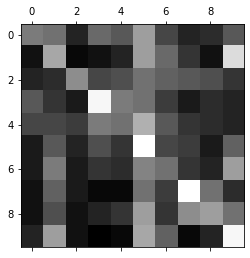

In [10]:
plt.matshow(conf_mx,cmap=plt.cm.gray)

In [12]:
sgd_clf_f = SGDClassifier(random_state=42)

sgd_clf_f.fit(X_train, y_train)

y_test_pred = sgd_clf_f.predict(X_test)

conf_mx_f = confusion_matrix(y_test, y_test_pred)
conf_mx_f

array([[ 3,  2,  0,  4,  2,  4,  4,  1,  0,  8],
       [ 2,  4,  0,  0,  0,  3,  1,  2,  3, 11],
       [ 1,  0,  6,  2,  3,  2,  1,  4,  1,  5],
       [ 1,  2,  4,  6,  2,  2,  0,  0,  0,  5],
       [ 0,  1,  4,  3,  2,  3,  4,  0,  1,  1],
       [ 1,  5,  1,  0,  0,  6,  0,  3,  2,  4],
       [ 2,  2,  0,  0,  0,  3,  4,  1,  0, 12],
       [ 1,  3,  1,  1,  1,  4,  2,  9,  0,  4],
       [ 1,  1,  3,  1,  3,  1,  1,  3,  2,  0],
       [ 0,  4,  0,  0,  0,  3,  5,  0,  0,  9]])

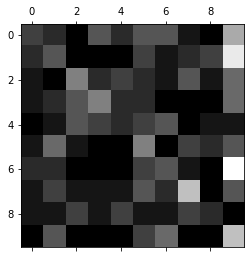

In [13]:
plt.matshow(conf_mx_f,cmap=plt.cm.gray)